In [32]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from IPython.display import Image  
from subprocess import call

In [33]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
# Information about the columns
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
# Drop uneccessary columns
titanic_df.drop((['PassengerId', 'Name', 'Ticket', 'Cabin']), axis=1, inplace=True)

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [36]:
# Unique entries in the Sex column
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [37]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,S,False,True
1,1,1,38.0,1,0,71.2833,C,True,False
2,1,3,26.0,0,0,7.9250,S,True,False
3,1,1,35.0,1,0,53.1000,S,True,False
4,0,3,35.0,0,0,8.0500,S,False,True


Now, we do the same to the "Embarked" column.

In [38]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


In [39]:
# Check for missing values
titanic_df.isnull().sum()

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [40]:
# Replace the missing values in 'Age' with the median
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())

In [41]:
# Check for missing values
titanic_df.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [42]:
# Select relevant variables
X = titanic_df.drop(columns=['Survived'])
y = titanic_df['Survived']

In [43]:
# Split the original dataset into training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

# Split the training set further into training and development sets
X_train, X_dev, y_train, y_dev = train_test_split(X_train_full,
y_train_full, test_size=0.2, random_state=42)

In [44]:
# Train the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [45]:
# Create list containing feature names
features = X_train.columns.tolist()
features

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

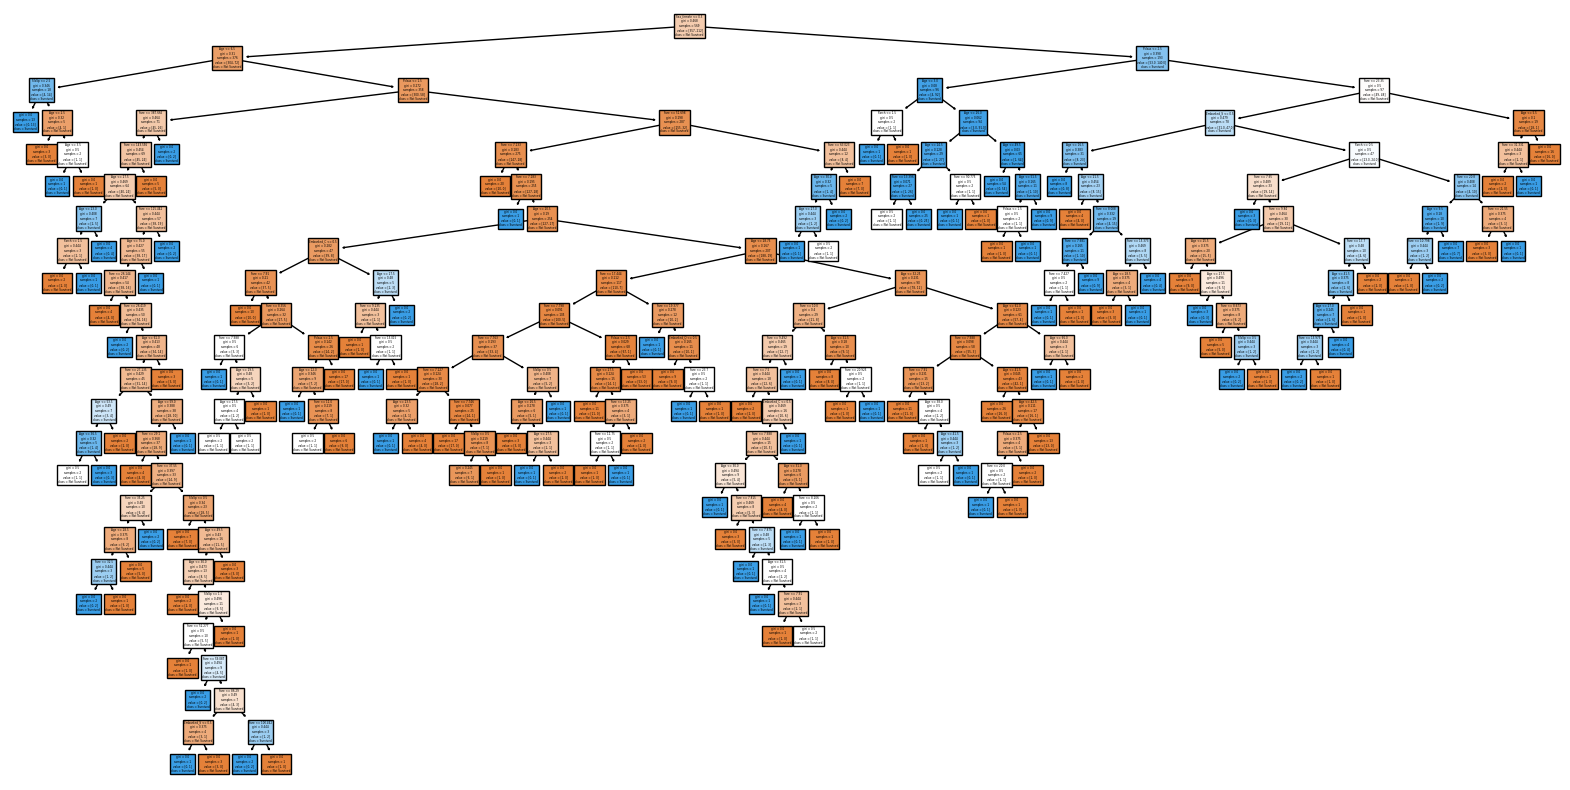

In [46]:
# Plot the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=features, class_names=['Not Survived', 'Survived'])
plt.show()

In [47]:
# Get accuracy of Decision Tree on development set
y_pred_dev = clf.predict(X_dev)
accuracy = accuracy_score(y_dev, y_pred_dev)
accuracy

0.7762237762237763

In [48]:
# Prepare lists to store accuracies
train_accuracies = []
dev_accuracies = []

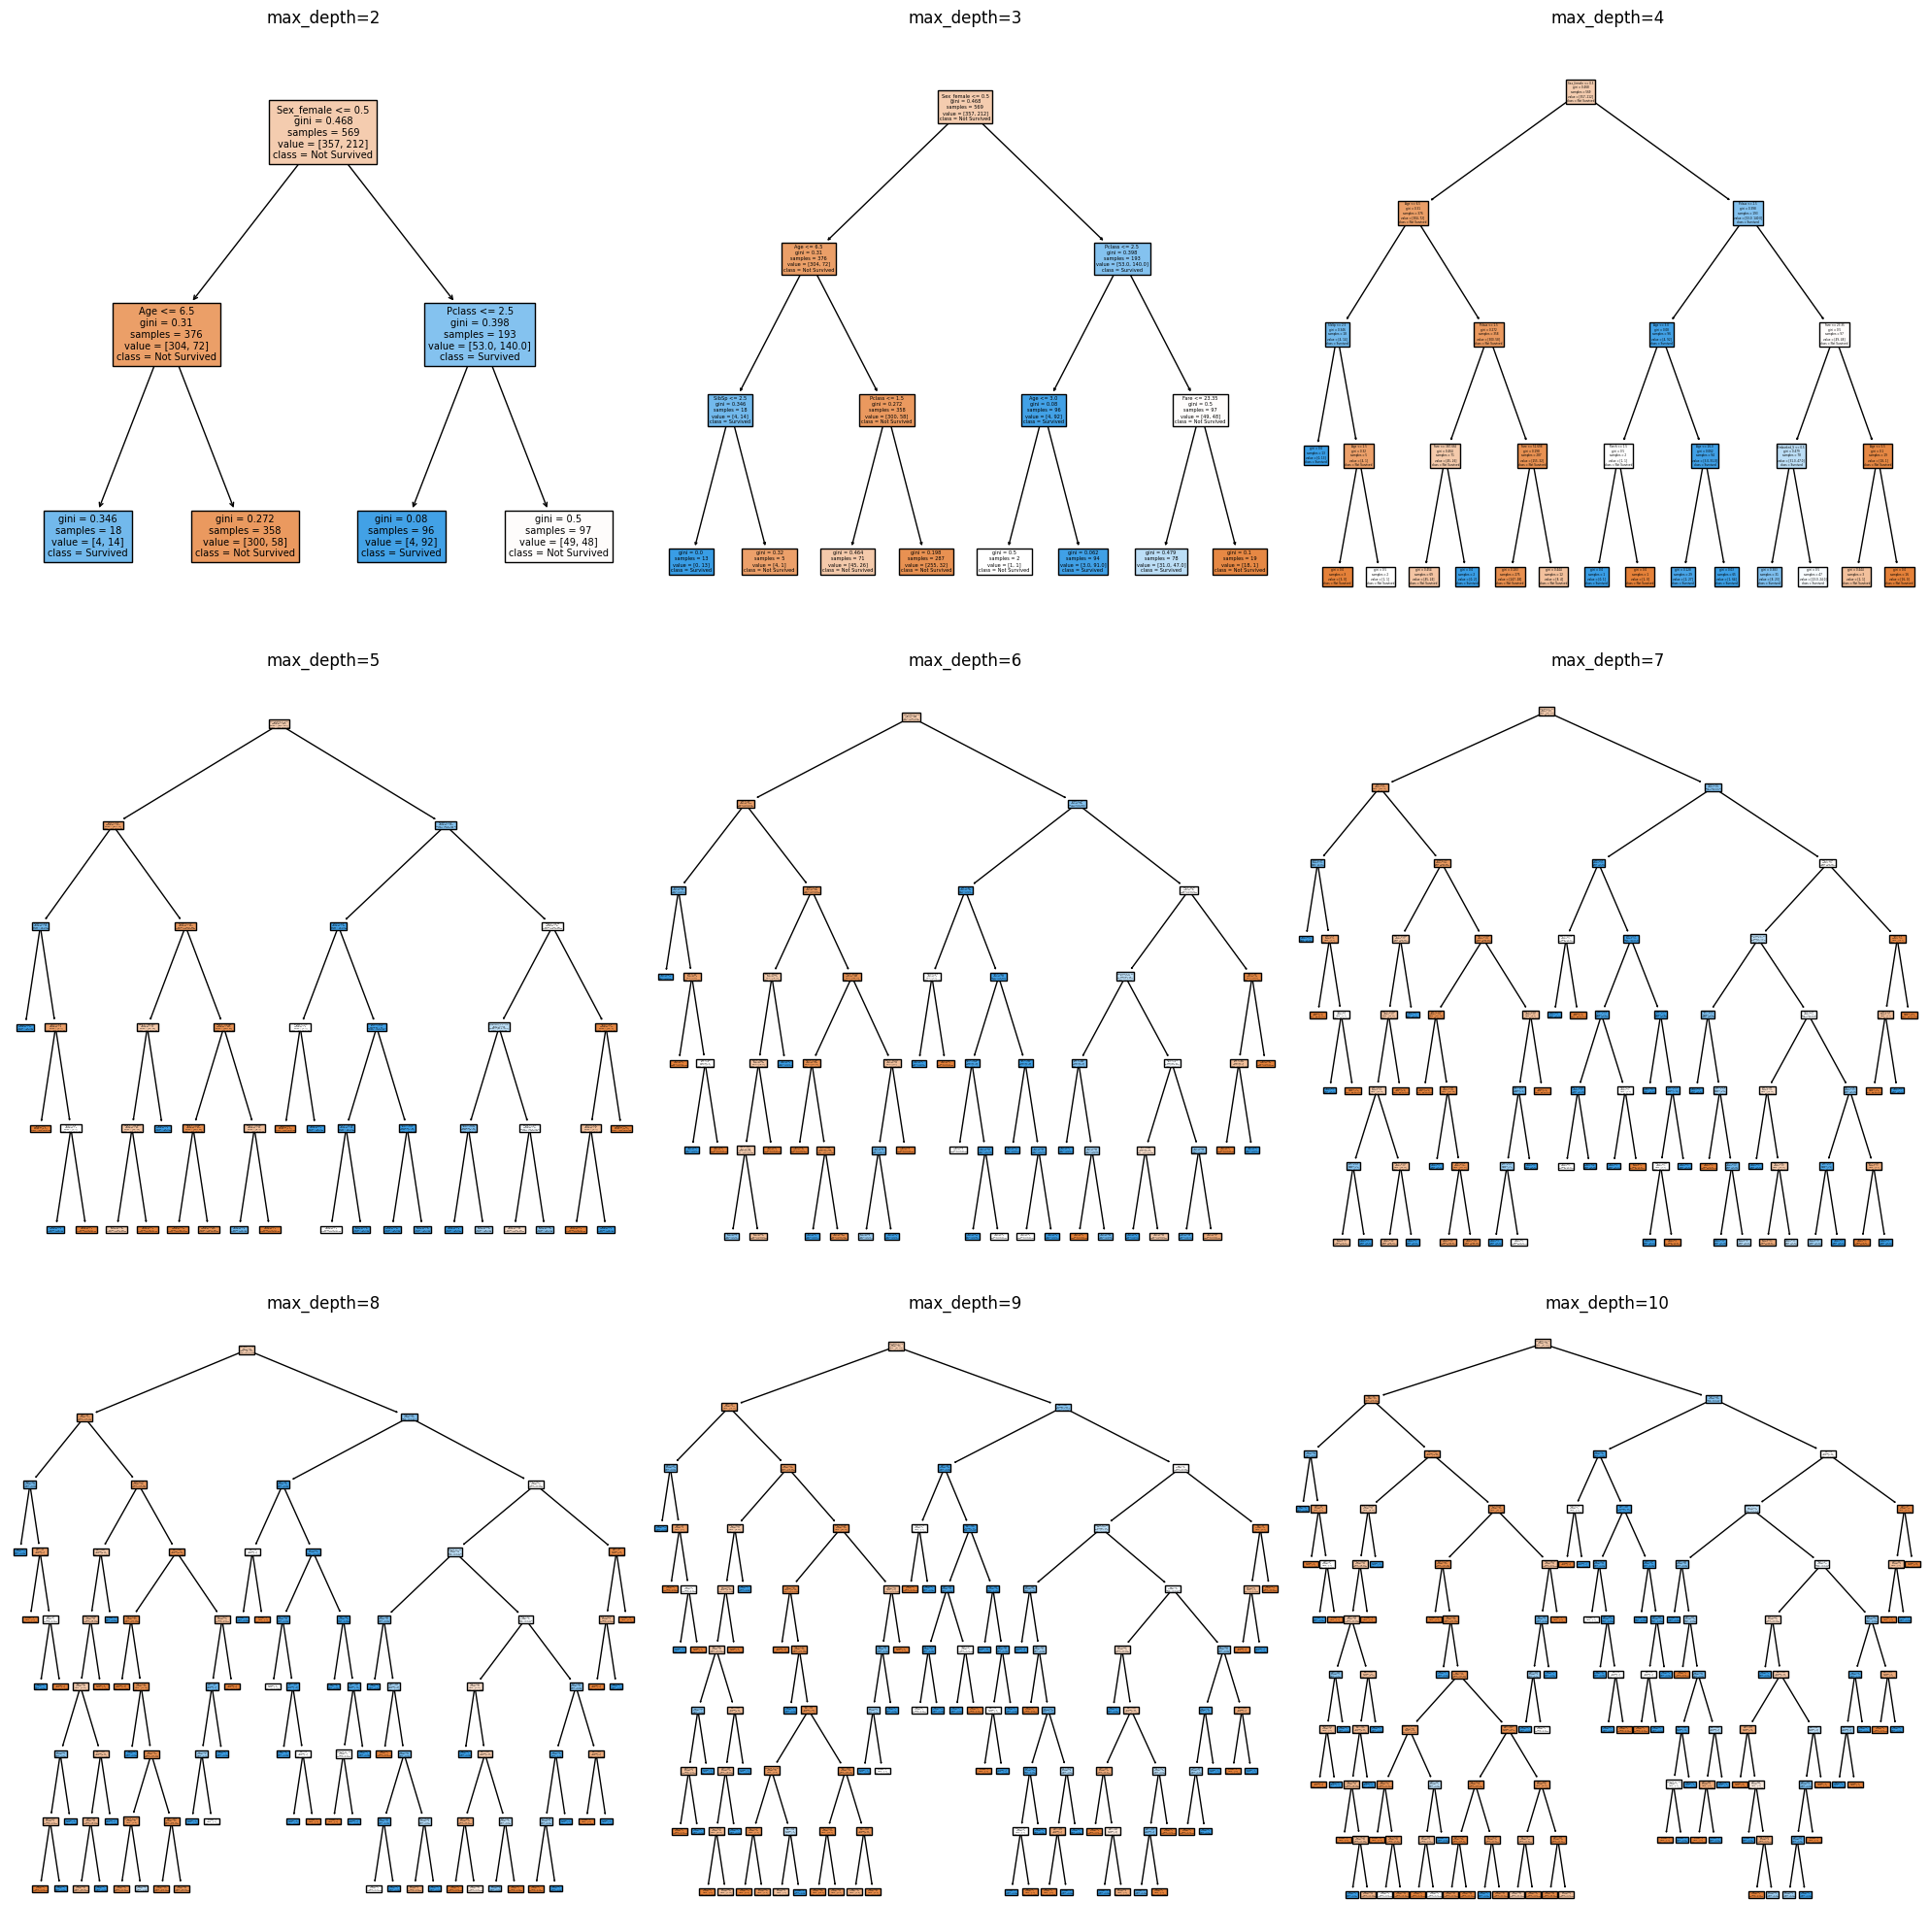

In [49]:
# Set up subplots for Decision Trees
fig, axes = plt.subplots(3, 3, figsize=(20, 20)) 
axes = axes.flatten() # for easy iteration

# Loop over different values of max_depth
for i, max_depth in enumerate(range(2, 11)): 
    
    # Train the Decision Tree model with the current max_depth
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)

    # Predict on training and development sets
    y_train_pred = clf.predict(X_train)
    y_dev_pred = clf.predict(X_dev)

    # Compute accuracies for both
    train_accuracy = accuracy_score(y_train, y_train_pred)
    dev_accuracy = accuracy_score(y_dev, y_dev_pred)

    # Store accuracies
    train_accuracies.append(train_accuracy)
    dev_accuracies.append(dev_accuracy)

    # Plot the Decision Tree
    tree.plot_tree(clf, filled=True, feature_names=features, class_names=['Not Survived', 'Survived'], ax=axes[i])
    axes[i].set_title(f"max_depth={max_depth}")

  # Adjust layout
plt.tight_layout()
plt.show()

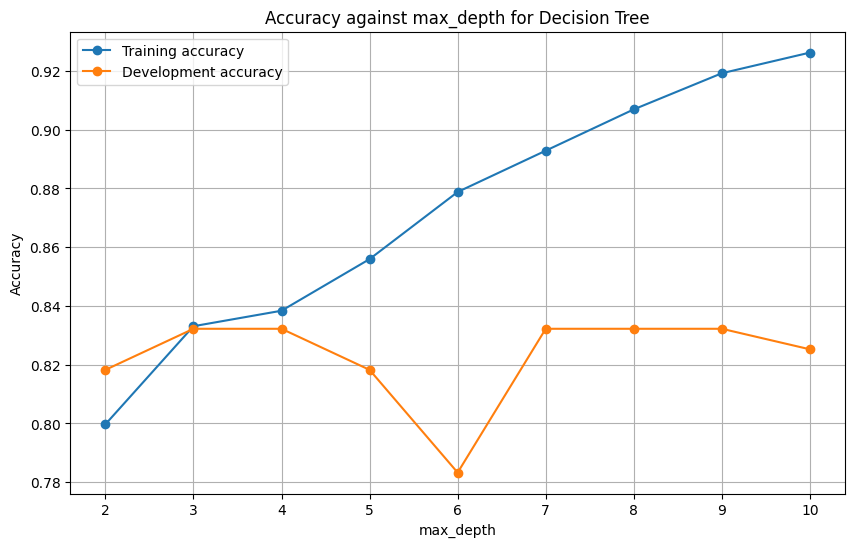

In [50]:
# Plot accuracies vs. max_depth
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), train_accuracies, marker='o', label='Training accuracy')
plt.plot(range(2, 11), dev_accuracies, marker='o', label='Development accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Accuracy against max_depth for Decision Tree')
plt.legend() 
plt.grid(True)

The training accuracy steadily increases with increasing max_depth. This is expected because deeper trees can model the training data more precisely, capturing more details and patterns, which leads to higher training accuracy. At max_depth = 10, the training accuracy is close to 1.0, indicating the model has learned almost all patterns in the training data. 

The development accuracy initially increases as max_depth increases but reaches a peak around max_depth = 4, with accuracy arround 0.83. Beyond this max_depth, the development accuracy fluctuates and does not show a consistent improvement. It slightly decreases at some depths, indicating overfitting.

The final model with max_depth = 4 achieves the best balance between training and development accuracy, suggesting it generalises well to new, unseen data.

In [51]:
# Accuracy of final model with optimal max_depth
clf_final = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_final.fit(X_train, y_train)

y_test_pred = clf_final.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_accuracy

0.7932960893854749

In [53]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(class_report)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_test_pred)
print(f"ROC-AUC Score: {roc_auc:.2f}")

Confusion Matrix:
[[92 13]
 [23 51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

ROC-AUC Score: 0.78


The accuracy of the final model on the test data is 79.3% which indicates that the decision tree is faily accuracte in predicting passenger survival. The model performs better in predicting passengers who did not survive compared to those who did. This suggests that there are higher false negatives when predicting the survived class.